# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | forster
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | conception bay south
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | alotau
City not found. Skipping...
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | crane
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | ebon
Processing Record 20 of Set 1 | olyokminsk
Processing Record 21 of Set 1 | taiohae
City not found. Skippi

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,35.11,100,100,4.61,US,1708989434
1,isafjordur,66.0755,-23.1240,33.80,88,86,2.26,IS,1708989419
2,tazovsky,67.4667,78.7000,17.89,93,68,12.39,RU,1708989443
3,forster,-32.1667,152.5167,80.29,70,89,2.66,AU,1708989463
4,bethel,41.3712,-73.4140,46.63,66,42,1.01,US,1708989424


In [40]:
# Export the City_Data into a csv (also used in vactaion py)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,35.11,100,100,4.61,US,1708989434
1,isafjordur,66.0755,-23.1240,33.80,88,86,2.26,IS,1708989419
2,tazovsky,67.4667,78.7000,17.89,93,68,12.39,RU,1708989443
3,forster,-32.1667,152.5167,80.29,70,89,2.66,AU,1708989463
4,bethel,41.3712,-73.4140,46.63,66,42,1.01,US,1708989424


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

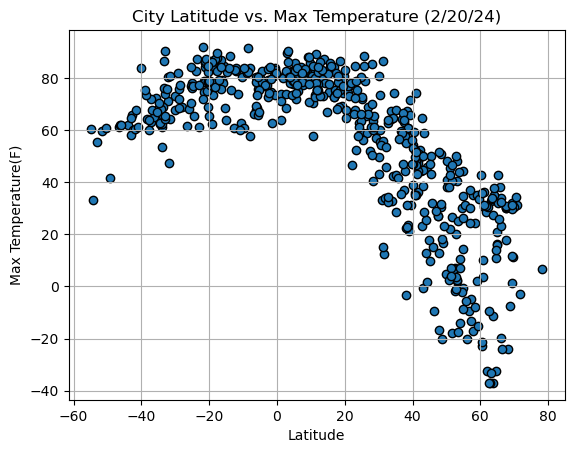

In [42]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.title("City Latitude vs. Max Temperature (2/20/24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

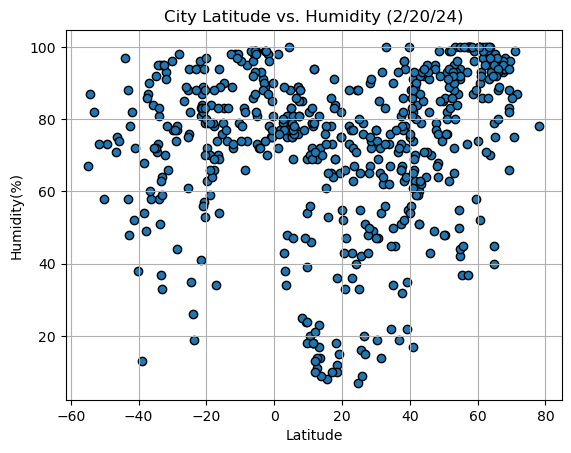

In [43]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.title("City Latitude vs. Humidity (2/20/24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

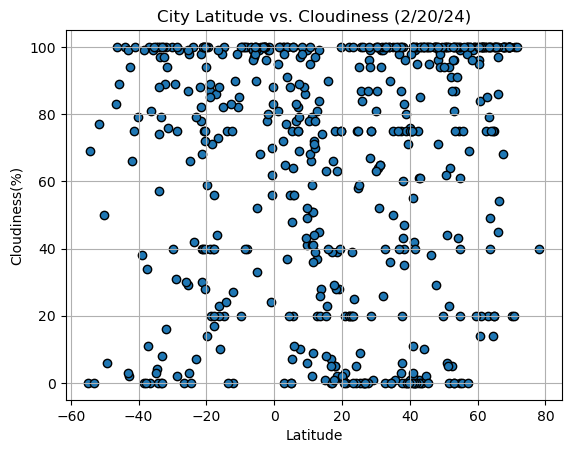

In [44]:
# Build the scatter plots for latitude vs. cloudiness

x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.title("City Latitude vs. Cloudiness (2/20/24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

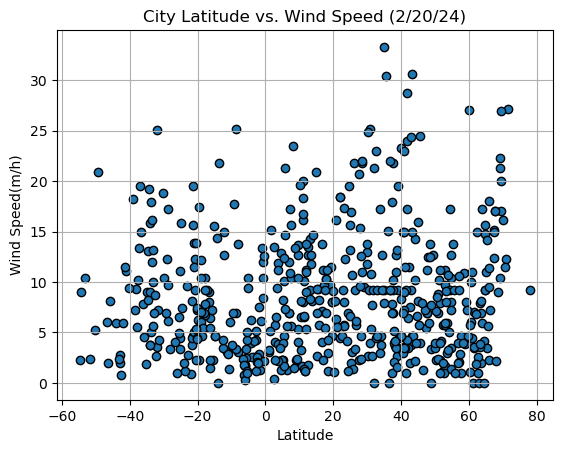

In [45]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
plt.title("City Latitude vs. Wind Speed (2/20/24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/h)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_plot(x,y,x_,y_):
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    y_regress=slope*x+intercept
    plt.plot(x,y_regress, color="r")
    print(f"The r-value is: {r**2}")
    equation=f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(equation,xy=(x_,y_),color="r",fontsize=15)
    
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,35.11,100,100,4.61,US,1708989434
1,isafjordur,66.0755,-23.1240,33.80,88,86,2.26,IS,1708989419
2,tazovsky,67.4667,78.7000,17.89,93,68,12.39,RU,1708989443
4,bethel,41.3712,-73.4140,46.63,66,42,1.01,US,1708989424
6,tura,25.5198,90.2201,58.66,42,100,3.04,IN,1708989442


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,forster,-32.1667,152.5167,80.29,70,89,2.66,AU,1708989463
5,vanimo,-2.6741,141.3028,79.34,89,100,5.19,PG,1708989529
7,cidreira,-30.1811,-50.2056,73.00,96,100,18.79,BR,1708989452
10,port-aux-francais,-49.3500,70.2167,41.58,73,6,20.87,TF,1708989431
11,west island,-12.1568,96.8225,82.62,72,27,12.68,CC,1708989432


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.677605694310703


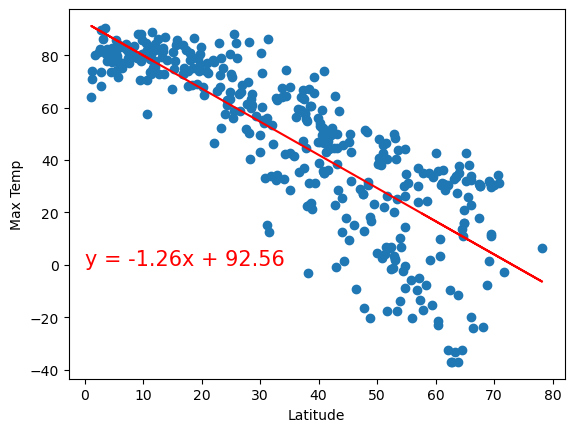

In [57]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]

linear_plot(x,y,0,0)



The r-value is: 0.2731475782591169


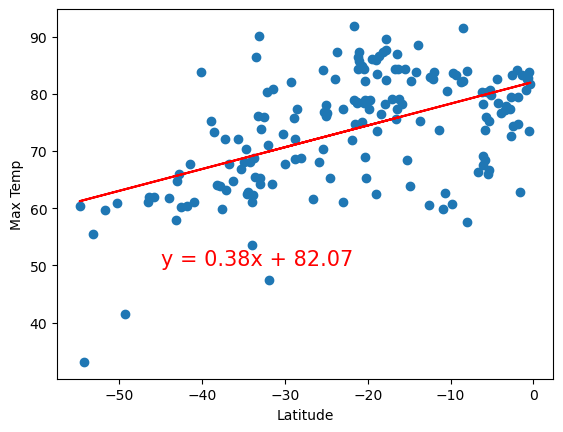

In [70]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]

linear_plot(x,y,-45,50)

**Discussion about the linear relationship:**



Temp N#This linear regression is modeling the relationship between temperature and latitude in the Northern Hemisphere.  As latitude increases, we can see that temperature decreases and there is a correlation between the two variables.  The graph displays data points that are dense around the trend line and the r-value is close to 1 at 0.7s, we can conclude that these two variables show a correlation.

TempS
#This linear regression is modeling the relationship between temperature and latitude in the Southern Hemisphere.  As latitude increases, we can see that temperature increases and there seems to be a correlation but the scatter dots are not condensed around the linear line and the the r-value is 0.27 which is far from 1.  I would conclude that there is little to no correlation between the two variables.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16011111955524288


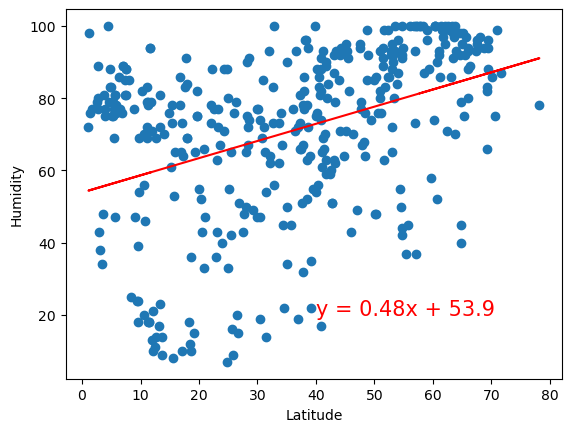

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]

linear_plot(x,y,40,20)

The r-value is: 0.10995995331954136


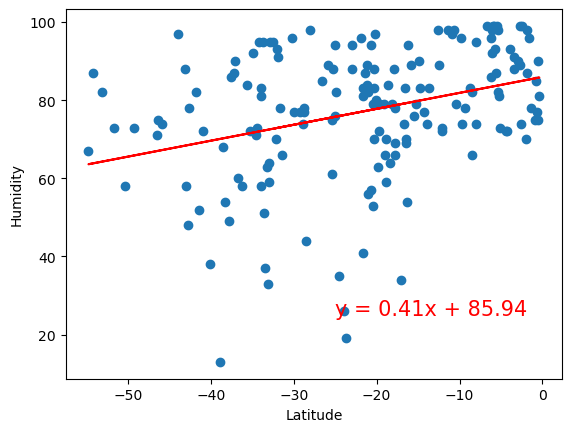

In [58]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]

linear_plot(x,y,-25,25
           )

**Discussion about the linear relationship:** 

Hum - N#This linear regression is modeling the relationship between humidity and latitude in the Northern Hemisphere.  As latitude increases, we can see that humidity increases and there is a questionable relationship between the two variables.  The graph displays data points that are not dense around  the trend line and the r-value is 0.16 which is far from 1 so we can conclude that these two variables do not show a correlation.

HumS
#This linear regression is modeling the relationship between humidity and latitude in the Southern Hemisphere.  As latitude increases, we can see that humidity increases and there seems to be a correlation but the scatter dots are not condensed around the linear line and the the r-value is 0.10 which is far from 1.  I would conclude that there is little to no correlation between the two variables.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0510144198137696


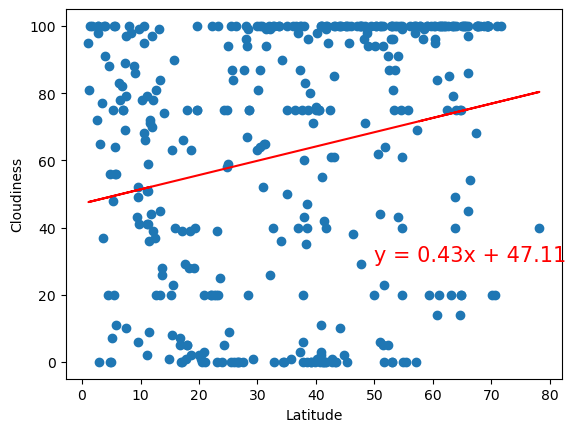

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]

linear_plot(x,y,50,30)

The r-value is: 0.06308522796792305


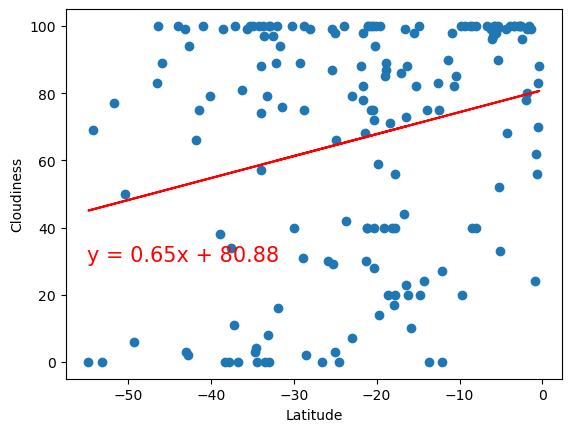

In [64]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]

linear_plot(x,y,-55,30)

**Discussion about the linear relationship:** 

Cloudiness N
#This linear regression is modeling the relationship between cloudiness and latitude in the Northern Hemisphere.  As latitude increases, we can see that cloudiness shows no consistency. There is a questionable relationship between the two variables.  The graph displays data points that are not dense around the trend line and the r-value is 0.05 which is far from 1 so we can conclude that these two variables do not show a correlation.

Cloudiness S
#This linear regression is modeling the relationship between cloudiness and latitude in the Southern Hemisphere.  As latitude increases, we can see that cloudiness shows no consistency around trend.  We can see that but the scatter dots are not condensed around the linear line and the the r-value is 0.06 which is far from 1.  I would conclude that there is little to no correlation between the two variables.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00031195453197504147


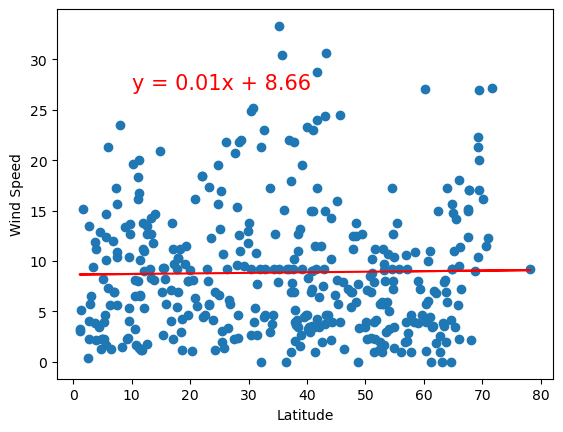

In [68]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]

linear_plot(x,y,10,27)

The r-value is: 0.03798870277507068


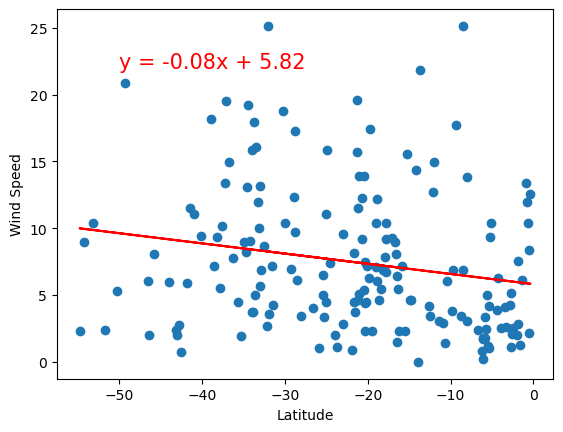

In [69]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]

linear_plot(x,y,-50,22)

**Discussion about the linear relationship:** 

Wind Speed N
#This linear regression is modeling the relationship between wind speed and latitude in the Northern Hemisphere.  As latitude increases, we can see that windspeed shows no consistency. There is a questionable relationship between the two variables.  The graph displays data points that are not dense around the trend line and the r-value is 0.00003 which is far from 1 so we can conclude that these two variables do not show a correlation.

Wind Speed S
#This linear regression is modeling the relationship between wind speed and latitude in the Southern Hemisphere.  As latitude increases, we can see that wind speed shows no consistency around trend.  We can see that but the scatter dots are not condensed around the linear line and the the r-value is 0.038 which is far from 1.  I would conclude that there is little to no correlation between the two variables.
